# Fashin MNIST Dataset
## in ```tensorflow.keras.datasets.fashion_mnist```
![fashionmnist.png](fashionmnist.png)

* ```train_image.shape``` = (60000,28,28,1)
* ```test_image.shape``` = (10000,28,28,1)
* ```train_label.shape``` = (60000,)
* ```test_label.shape``` = (10000,)

|Index|Category|
|:-----:|:-----|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


y = 2 Pullover


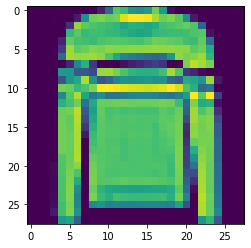

Number of train data - 60000
Number of test data - 10000


In [8]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])
plt.show()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))


In [9]:
# 6만장 중, 1~5000장은 valid dataset, 5001장부터 60000장은 training dataSet
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print(x_train.shape, x_valid.shape)
print(y_train.shape, y_valid.shape)

(55000, 28, 28) (5000, 28, 28)
(55000,) (5000,)


In [10]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')


x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


<center><img src="https://drive.google.com/uc?id=1eMJDywkwenvNfRUIPUEzsK-vomeNVIQ1" width="800" height="400"></center>

In [11]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

1. Passing ```conv2d layer``` with kernel_size=2 and 64 output.
    - convolutioned size: $28 \times 28$ (**padding='same'**)
    - parameters from weight: $2 \times 2 \times 64 = 256$ (4 from kernel, 64 output)
    - parameters from bias: $64$ (64 output)
    - total parameter in this layer: $256 + 64 = 320$

2. Passing ```max_pooling2d``` layer with pool_size=2.
    - output size: $14 \times 14$
    - No parameter

3. Passing ```dropout``` layer
    - Take off 30% of its nodes randomly (in realtime)
    - All weights would be still updated.
    - No parameter change

4. Passing ```conv2d_1``` layer with kernel_size=2 and 32 output.
    - convolutioned size $= 14 \times 14$ (**padding='same'**)
    - parameters from weight: $2 \times 2 \times 64 \times 32  = 8192$ (64 input, 4 from kernel, 32 output)
    - parameters from bias: $32$ (32 output)
    - total parameter in this layer: $8192 + 32 = 8224$

5. Passing ```max_pooling2d_1``` layer with pool_size=2.
    - output size: $7 \times 7$
    - No parameter

6. Passing ```dropout_1``` layer
    - Take off 30% of its nodes randomly (in realtime)
    - All weights would be still updated.
    - No parameter change

7. Passing ```flatten``` layer
    - size: $1568 \quad (\because 7 \times 7 \times 32 = 1568)$
    - No parameter

8. Passing ```dense``` layer
    - size: 128
    - parameters from weight: $1568 \times 256 = 401408$ (576 input, 128 output)
    - parameters from bias: $256$ (256 output)
    - total parameter in this layer: $401408 + 256 = 401664$

9. Passing ```dropout_2``` layer
    - Take off 50% of its nodes randomly (in realtime)
    - All weights would be still updated.
    - No parameter change

10. Passing ```dense_1``` layer
    - size: 10
    - parameters from weight: $256 \times 10 = 2560$ (256 input, 10 output)
    - parameters from bias: $10$ (10 output)
    - total parameter in this layer: $2560 + 10 = 2570$

Total 412778 Parameters

In [12]:
import time
s = time.time()

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid) ,verbose=2)


# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
e = time.time()
print(e - s)

2021-07-20 10:00:48.994641: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 172480000 exceeds 10% of free system memory.
Epoch 1/10
860/860 - 73s - loss: 0.6025 - accuracy: 0.7766 - val_loss: 0.3684 - val_accuracy: 0.8688
Epoch 2/10
860/860 - 72s - loss: 0.4115 - accuracy: 0.8485 - val_loss: 0.3198 - val_accuracy: 0.8872
Epoch 3/10
860/860 - 70s - loss: 0.3682 - accuracy: 0.8653 - val_loss: 0.2916 - val_accuracy: 0.8918
Epoch 4/10
860/860 - 68s - loss: 0.3384 - accuracy: 0.8758 - val_loss: 0.2780 - val_accuracy: 0.8988
Epoch 5/10
860/860 - 70s - loss: 0.3214 - accuracy: 0.8817 - val_loss: 0.2590 - val_accuracy: 0.9090
Epoch 6/10
860/860 - 71s - loss: 0.3083 - accuracy: 0.8863 - val_loss: 0.2566 - val_accuracy: 0.9030
Epoch 7/10
860/860 - 71s - loss: 0.2936 - accuracy: 0.8909 - val_loss: 0.2517 - val_accuracy: 0.9050
Epoch 8/10
860/860 - 71s - loss: 0.2813 - accuracy: 0.8949 - val_loss: 0.2313 - val_accuracy: 0.9154
Epoch 9/10
860/860 - 71s - loss: 0.2750 - accuracy:

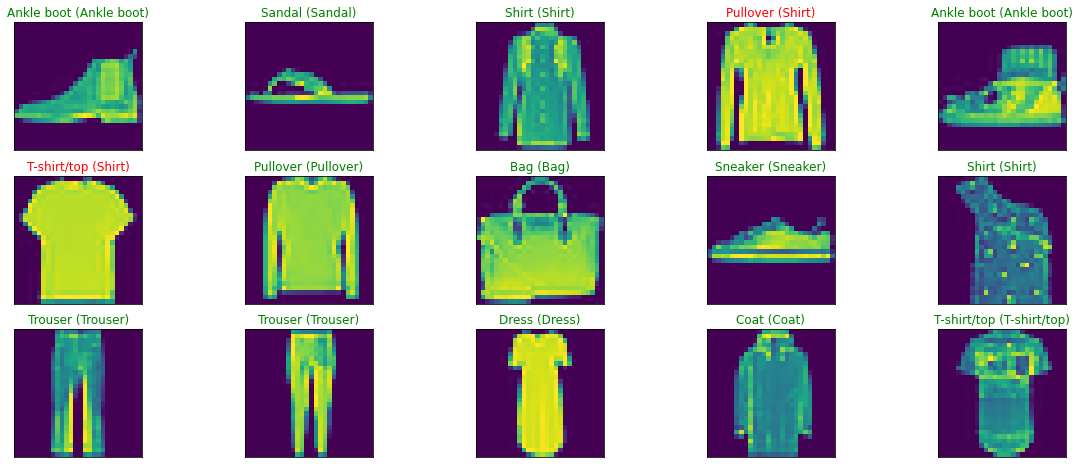

In [13]:
import numpy as np
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))